# Distribution B - Maximum Likelihood - Overfit

In [1]:
import DistExampB as db
from matplotlib import pyplot as plot
import sympy as sp

import MlePdf

from math import log, pi, sqrt
from numpy import sinc
from engineering_notation import EngNumber as EngrNum

from LocUtil import Grid1, MinMax, SetSeed, UnZip
from LocMath import Interp1
from Map import LogRatio
from Sinc import SincApprox

In [2]:
nPlot = 101
givenSeed = None
seedDig = 3

## Setup

In [11]:
dist = db.ExampB()

In [12]:
xSym = sp.Symbol('x')
zSym = sp.Symbol('z')
map_ = LogRatio(xSym,zSym, xRange=(0,2))
map_.forSym

log(x/(2 - x))

In [13]:
X2Z = map_.Forward
Z2X = map_.Inverse

### Solve

In [14]:
nSamp = 400

In [15]:
seed = SetSeed(givenSeed, digits=seedDig)
if givenSeed is None:
	print(f'seed = {seed}')

seed = 660


In [16]:
sampX = tuple(dist.Sample() for _ in range(nSamp))
MinMax(tuple(X2Z(x) for x in sampX))

(-3.005956148143805, 3.461606769005005)

In [17]:
trueLogLike = sum(log(dist.Pdf(x)) for x in sampX)
trueLogLike

-114.71250616114172

In [18]:
nSincRange = tuple(range(3,15))

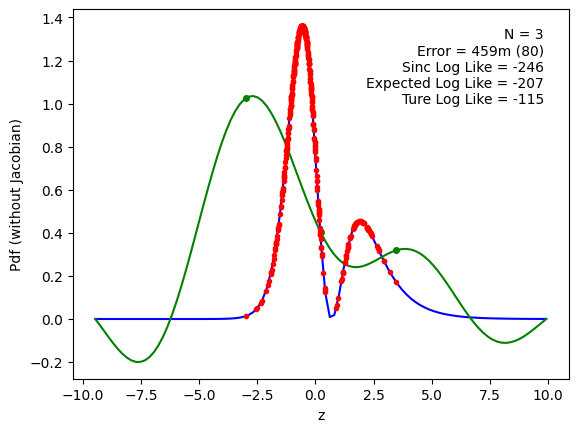

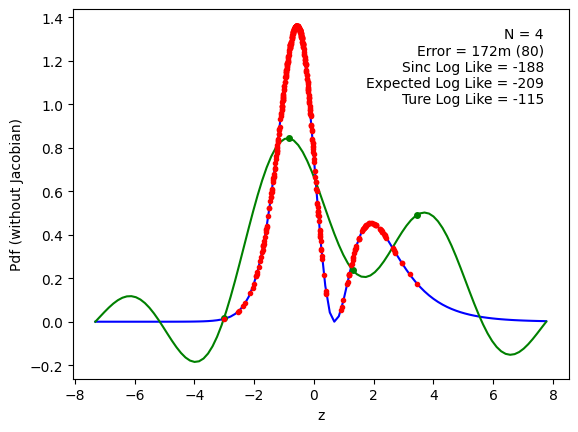

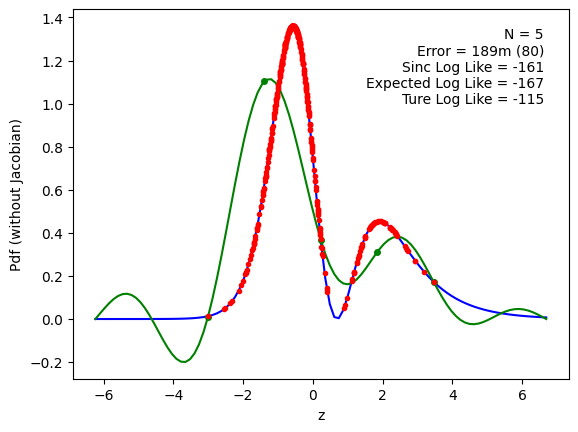

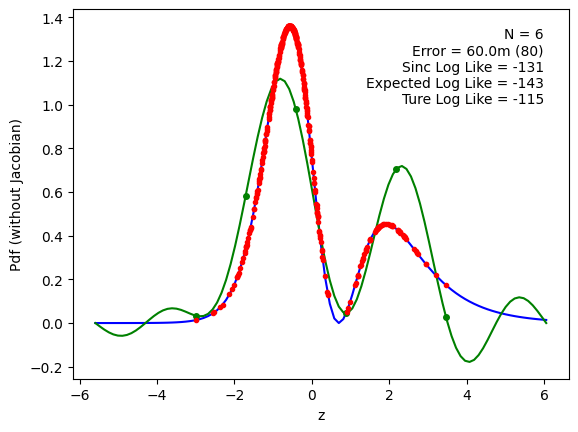

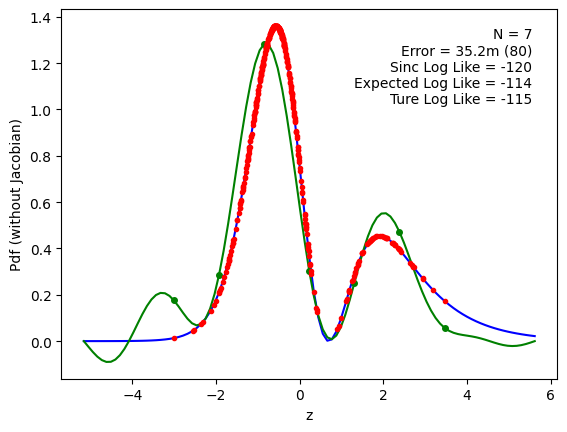

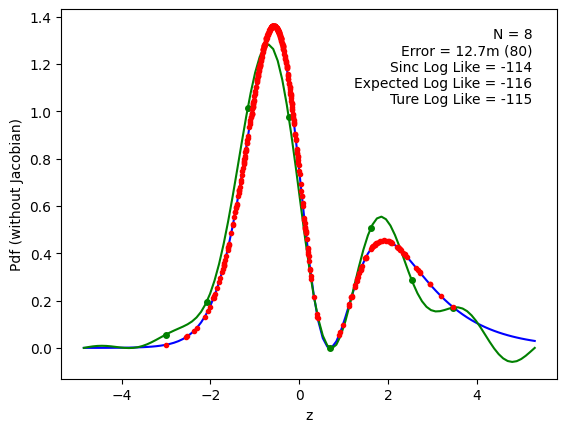

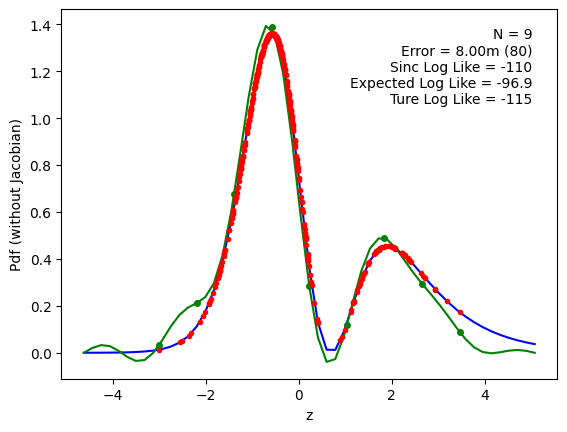

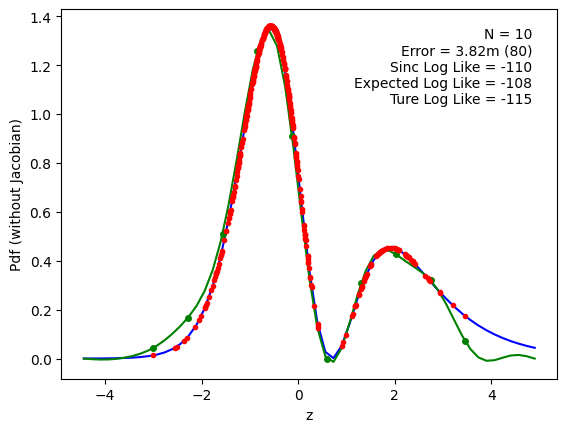

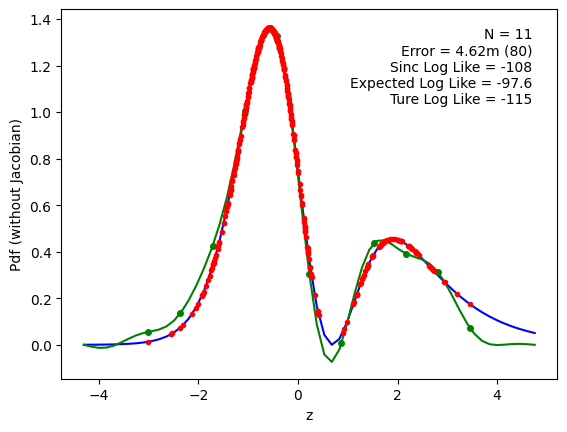

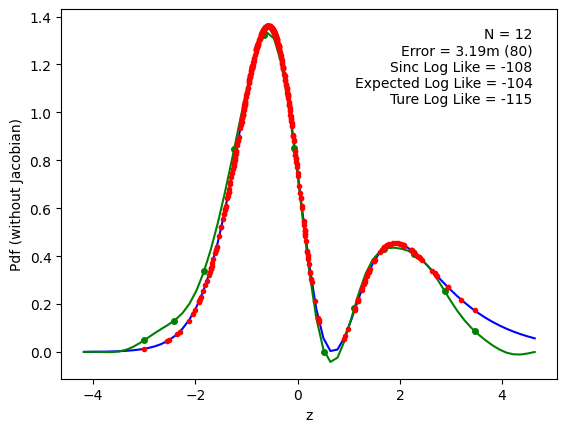

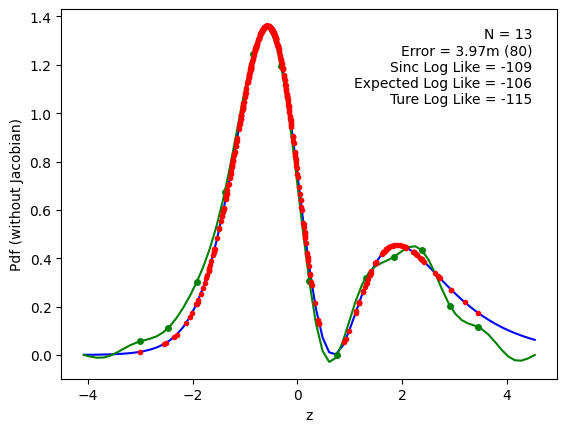

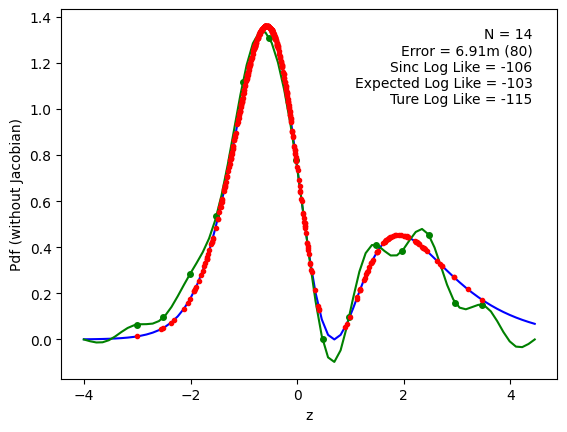

In [22]:
info = []

for nSinc in nSincRange:
	# compute MLE
	pdfApprox = MlePdf.Sinc(sampX, map_, nSinc)
	
	# get errors of est
	rmsErr,rmsN = MlePdf.RmsDiff(pdfApprox, dist.Pdf)
	sincLogLike = MlePdf.EstLogLike(pdfApprox, sampX)
	expLogLike,expN = MlePdf.ExpLogLike(pdfApprox)
	
	# plot
	text = (		
		f'N = {nSinc}\n'
		f'Error = {EngrNum(rmsErr, significant=3)} ({rmsN})\n'
		f'Sinc Log Like = {EngrNum(sincLogLike, significant=3)}\n'
		f'Expected Log Like = {EngrNum(expLogLike * nSamp, significant=3)}\n'
		f'Ture Log Like = {EngrNum(trueLogLike, significant=3)}\n'
	)
	
	# fig,ax = plot.subplots(figsize=(9, 6.5))
	MlePdf.PlotPdfEstZ(pdfApprox, dist.Pdf, sampX, text)
	plot.show()
	
	# accumulate results
	info.append([nSinc, seed, [rmsErr, rmsN, sincLogLike]])

## Debug

In [7]:
pdfTrue = tuple(dist.Pdf(x) for x in sampX)

NameError: name 'sampX' is not defined

In [ ]:
approx10 = MlePdf.Sinc(sampX, map_, 10)

In [ ]:
pdfEst10 = approx10.InterpX1(sampX)
err10 = tuple(e - t for (e,t) in zip(pdfEst10, pdfTrue))

In [ ]:
plot.plot(sampX, pdfEst10, '.', c='red')

xGrid = Grid1(0,2, nPlot)
pdfGrid = tuple(dist.Pdf(x) for x in xGrid)
plot.plot(xGrid, pdfGrid, c='blue')

In [ ]:
plot.plot(sampX, err10, '.', c='red')

plot.plot([0,2], [0,0], ':', c='black')

sincErr = tuple(v - dist.Pdf(x) for (x,v) in zip(approx10.sincX, approx10.sincV))
plot.plot(approx10.sincX, sincErr, 'o', c='green')

In [28]:
sqrt(sum(e*e for e in err10) / nSamp)

0.07247107949111278

In [29]:
logLike = sum(log(p) for p in pdfEst10)
logLike

-114.17534022466953

RMS error for sinc approx at n=10

#### Look at Deadbeat Response

In [5]:
sincZ = approx10.sincZ

NameError: name 'approx10' is not defined

In [6]:
pdfAtSinc = tuple(dist.Pdf(map_.Inverse(z)) for z in sincZ)
deadApprox = SincApprox(sincZ[0],sincZ[9],10, pdfAtSinc, map_)

NameError: name 'sincZ' is not defined

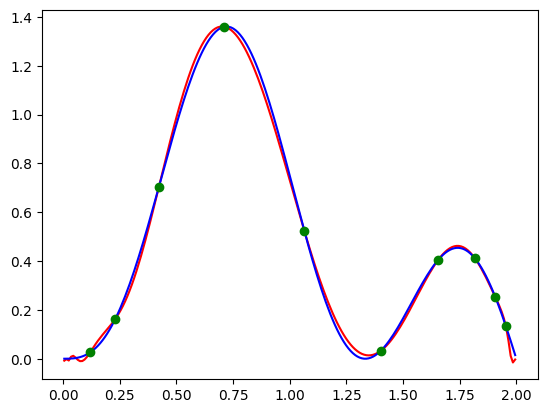

In [32]:
xGrid = tuple(2*(k + 0.5) / nPlot for k in range(nPlot))

deadBeadGrid = deadApprox.InterpX1(xGrid)
plot.plot(xGrid, deadBeadGrid, c='red')

pdfGrid = tuple(dist.Pdf(x) for x in xGrid)
plot.plot(xGrid, pdfGrid, c='blue')

plot.plot(deadApprox.sincX, deadApprox.sincV, 'o', c='green')

In [4]:
pdfDead10 = deadApprox.InterpX1(sampX)
errDead10 = tuple(v - dist.Pdf(x) for (x,v) in zip(sampX, pdfDead10))

NameError: name 'deadApprox' is not defined

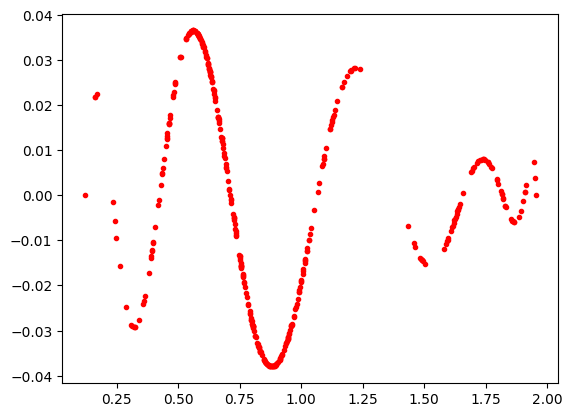

In [34]:
plot.plot(sampX,errDead10, '.', c='red')

In [35]:
sqrt(sum(e*e for e in errDead10) / nSamp)

0.023732328896104275

In [36]:
logLike = sum(log(p) for p in pdfDead10)
logLike

-118.81031463209243

#### Compare Dead with MLE

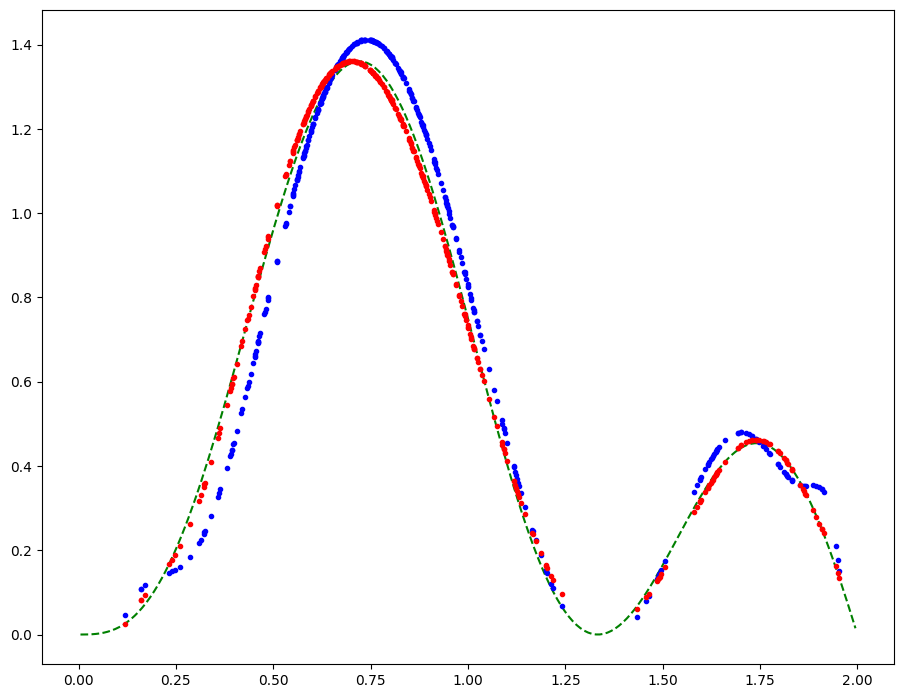

In [37]:
fix,ax = plot.subplots(figsize=(11, 8.5))

plot.plot(sampX, pdfEst10, '.', c='blue')
plot.plot(sampX, pdfDead10, '.', c='red')

plot.plot(xGrid,pdfGrid, '--', c='green',zorder=-2)

### Graph

Text(0.5, 0, 'n')

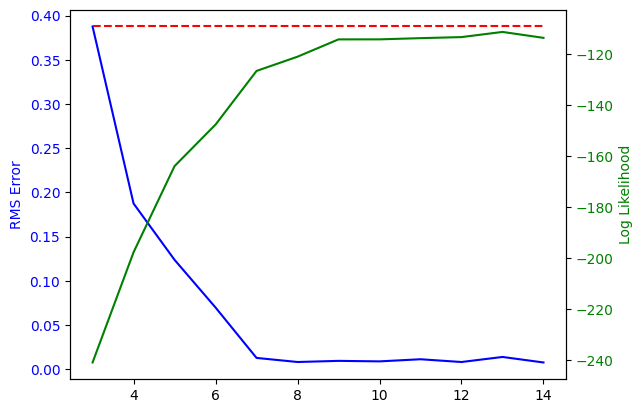

In [38]:
fix,ax0 = plot.subplots()

n,_,fitInfo = UnZip(info)
rmsErr,_,logLike = UnZip(fitInfo)

ax0.plot(n,rmsErr, c='blue')
ax0.set_ylabel('RMS Error', c='blue')
ax0.tick_params(axis='y', labelcolor='blue')

ax1 = ax0.twinx()
ax1.plot(n,logLike, c='green')
ax1.set_ylabel('Log Likelihood', c='green')
ax1.tick_params(axis='y', labelcolor='green')

plot.plot((3,14), tuple(-0.27279 * nSamp for _ in range(2)), '--', c='red')

plot.xlabel('n')